### This kernel is intended for beginners starting their journey in Data Science / Machine Learning. Consider this a beginner's guide (step by step guide that can serve as template) to Logistic Regression in R. This contains minimal explanations / concept discussions, but I've mentioned the sources so you can refer to it. If you find this kernel useful, please do upvote :)

## What is Logistic Regression?

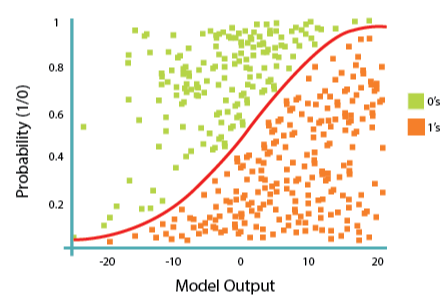

Logistic Regression is one of the machine learning algorithms that is used to predict/forecast variables that are categorical in nature; examples would be (1) whether a certain fruit is an apple or an orange or (2) whether an animal is a dog or cat. In simplified terms, it is used to solve classification tasks (don't get confused by the term regression).

## Case in Point
Consider this simple example of a plot of whether a tumor cell is malignant or benign, based on its size.
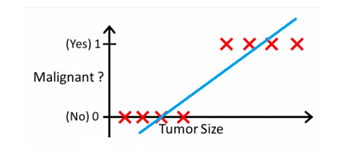

If we try to use linear regression, as visualized above, there can be predictions outside of 1 or 0, which is not we want for a classification problem.

To solve this issue, one can use logistic regression.
The idea is instead of trying to fit the predicted values (which lies from negative infinity to positive infinity) into a linear regression model, we sort of squash the predicted numbers into a range of [0,1]. We do this by using the sigmoid function which is the inverse of the logit function (aka the logarithm of the odds). 

If you want a more detailed explanation about logistic regression, you can visit Saishruthi Swaminathan's article here: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

As I've mentioned earlier, the goal of this notebook is to serve as a guide to beginners in implementing Logistic Regression in R. I believe using this fictional IBM HR Analytics Attrition Dataset is a good dataset to demonstrate logistic regression. Without further ado, let's get into it.

## Data Preprocessing

### Import the Data and Necessary Libraries

In [1]:
suppressMessages(library(plyr))
suppressMessages(library(Amelia))
suppressMessages(library(corrplot))
suppressMessages(library(ggplot2))
suppressMessages(library(MASS))
suppressMessages(library(randomForest))
suppressMessages(library(party))
suppressMessages(library(caret))
suppressMessages(library(GGally))
suppressMessages(library(corrplot))
suppressMessages(library(caTools))
suppressMessages(library(MASS))
suppressMessages(library(car))
suppressMessages(library(randomForest))
suppressMessages(library(dplyr))
suppressMessages(library(pROC))
suppressMessages(library(mboost))
suppressMessages(library(ggalluvial))
suppressMessages(library(gridExtra))
options(warn=-1)

df <- read.csv('../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv', stringsAsFactors = F, na.strings=c("","NA"," "))

##### Take a quick peek at the content

In [2]:
head(df)

Age Attrition BusinessTravel    DailyRate Department            
1 41  Yes       Travel_Rarely     1102      Sales                 
2 49  No        Travel_Frequently  279      Research & Development
3 37  Yes       Travel_Rarely     1373      Research & Development
4 33  No        Travel_Frequently 1392      Research & Development
5 27  No        Travel_Rarely      591      Research & Development
6 32  No        Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EmployeeCount EmployeeNumber ⋯
1 1                2         Life Sciences  1             1              ⋯
2 8                1         Life Sciences  1             2              ⋯
3 2                2         Other          1             4              ⋯
4 3                4         Life Sciences  1             5              ⋯
5 2                1         Medical        1             7              ⋯
6 2                2         Life Sciences  1             8              ⋯
  RelationshipSatisfaction StandardHours StockOptionLevel TotalWorkingYears
1 1                        80            0                 8               
2 4                        80            1                10               
3 2                        80            0                 7               
4 3                        80            0                 8               
5 4                        80            1                 6               
6 3                        80            0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

In [3]:
str(df)

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

In [5]:
summary(df)

      Age         Attrition         BusinessTravel       DailyRate     
 Min.   :18.00   Length:1470        Length:1470        Min.   : 102.0  
 1st Qu.:30.00   Class :character   Class :character   1st Qu.: 465.0  
 Median :36.00   Mode  :character   Mode  :character   Median : 802.0  
 Mean   :36.92                                         Mean   : 802.5  
 3rd Qu.:43.00                                         3rd Qu.:1157.0  
 Max.   :60.00                                         Max.   :1499.0  
  Department        DistanceFromHome   Education     EducationField    
 Length:1470        Min.   : 1.000   Min.   :1.000   Length:1470       
 Class :character   1st Qu.: 2.000   1st Qu.:2.000   Class :character  
 Mode  :character   Median : 7.000   Median :3.000   Mode  :character  
                    Mean   : 9.193   Mean   :2.913                     
                    3rd Qu.:14.000   3rd Qu.:4.000                     
                    Max.   :29.000   Max.   :5.000              

##### Make the necessesary modifications in features' types. We want columns like Attrition, EducationField, BusinessTravel, etc. to be of type factor instead of character.
*Note: For some reason,I had to mapout the string values of JobRole column since it returns a parse error in the later part (creating the glmboost model) 

In [6]:
df$Attrition  <-  as.factor(df$Attrition)
df$EducationField  <-  as.factor(df$EducationField)
df$BusinessTravel  <-  as.factor(df$BusinessTravel)
df$Department  <-  as.factor(df$Department)
df$JobRole  <-  as.factor(df$JobRole)
df$Over18  <-  as.factor(df$Over18)
df$OverTime  <-  as.factor(df$OverTime)
df$MaritalStatus  <-  as.factor(df$MaritalStatus)
df$Gender  <-  as.factor(df$Gender)
df <- subset(df, select = - c(EmployeeCount,StandardHours,EmployeeNumber))
df$JobRole <- mapvalues(df$JobRole, from = c("Healthcare Representative",
                                                 "Human Resources",
                                                 "Laboratory Technician",
                                                 "Manager",
                                                 "Manufacturing Director",
                                                 "Research Director",
                                                 "Research Scientist",
                                                 "Sales Executive",
                                                 "Sales Representative"),
                                            to = c('healthcarerepresentative',
                                                 'humanresources',
                                                 'laboratorytechnician',
                                                 'manager',
                                                 'manufacturingdirector',
                                                 'researchdirector',
                                                 'researchscientist',
                                                 'salesexecutive',
                                                 'salesrepresentative'))

##### Map the Values for the Attrition Variable

In [7]:
df$Attrition <- mapvalues(df$Attrition, from=c('Yes', 'No'), to = c(1,0))

##### Check the final structure of the dataframe

In [8]:
str(df)

'data.frame':	1470 obs. of  32 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 61 92 56 40 79 81 67 44 94 ...
 $ JobInvolvement          : int  3 2 2 3 3 3 4 3 2 3 ...
 $ JobLevel                : int  2

In [9]:
head(df)

Age Attrition BusinessTravel    DailyRate Department            
1 41  1         Travel_Rarely     1102      Sales                 
2 49  0         Travel_Frequently  279      Research & Development
3 37  1         Travel_Rarely     1373      Research & Development
4 33  0         Travel_Frequently 1392      Research & Development
5 27  0         Travel_Rarely      591      Research & Development
6 32  0         Travel_Frequently 1005      Research & Development
  DistanceFromHome Education EducationField EnvironmentSatisfaction Gender ⋯
1 1                2         Life Sciences  2                       Female ⋯
2 8                1         Life Sciences  3                       Male   ⋯
3 2                2         Other          4                       Male   ⋯
4 3                4         Life Sciences  4                       Female ⋯
5 2                1         Medical        1                       Male   ⋯
6 2                2         Life Sciences  4                       Male   ⋯
  PerformanceRating RelationshipSatisfaction StockOptionLevel TotalWorkingYears
1 3                 1                        0                 8               
2 4                 4                        1                10               
3 3                 2                        0                 7               
4 3                 3                        0                 8               
5 3                 4                        1                 6               
6 3                 3                        0                 8               
  TrainingTimesLastYear WorkLifeBalance YearsAtCompany YearsInCurrentRole
1 0                     1                6             4                 
2 3                     3               10             7                 
3 3                     3                0             0                 
4 3                     3                8             7                 
5 3                     3                2             2                 
6 2                     2                7             7                 
  YearsSinceLastPromotion YearsWithCurrManager
1 0                       5                   
2 1                       7                   
3 0                       0                   
4 3                       0                   
5 2                       2                   
6 3                       6

### Check for Missing Values

##### Check for number of missing values

In [10]:
#Code for resizing
fig <- function(w, h){
     options(repr.plot.width = w, repr.plot.height = h)
}

In [11]:
sapply(df, function(df){
sum(is.na(df)==T)/length(df)
})

Age                Attrition           BusinessTravel 
                       0                        0                        0 
               DailyRate               Department         DistanceFromHome 
                       0                        0                        0 
               Education           EducationField  EnvironmentSatisfaction 
                       0                        0                        0 
                  Gender               HourlyRate           JobInvolvement 
                       0                        0                        0 
                JobLevel                  JobRole          JobSatisfaction 
                       0                        0                        0 
           MaritalStatus            MonthlyIncome              MonthlyRate 
                       0                        0                        0 
      NumCompaniesWorked                   Over18                 OverTime 
                       0                        0                        0 
       PercentSalaryHike        PerformanceRating RelationshipSatisfaction 
                       0                        0                        0 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                       0                        0                        0 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
                       0                        0                        0 
 YearsSinceLastPromotion     YearsWithCurrManager 
                       0                        0

##### We are fortunate that there are no missing values. But for future reference, here's the code for visualizing the missingness map

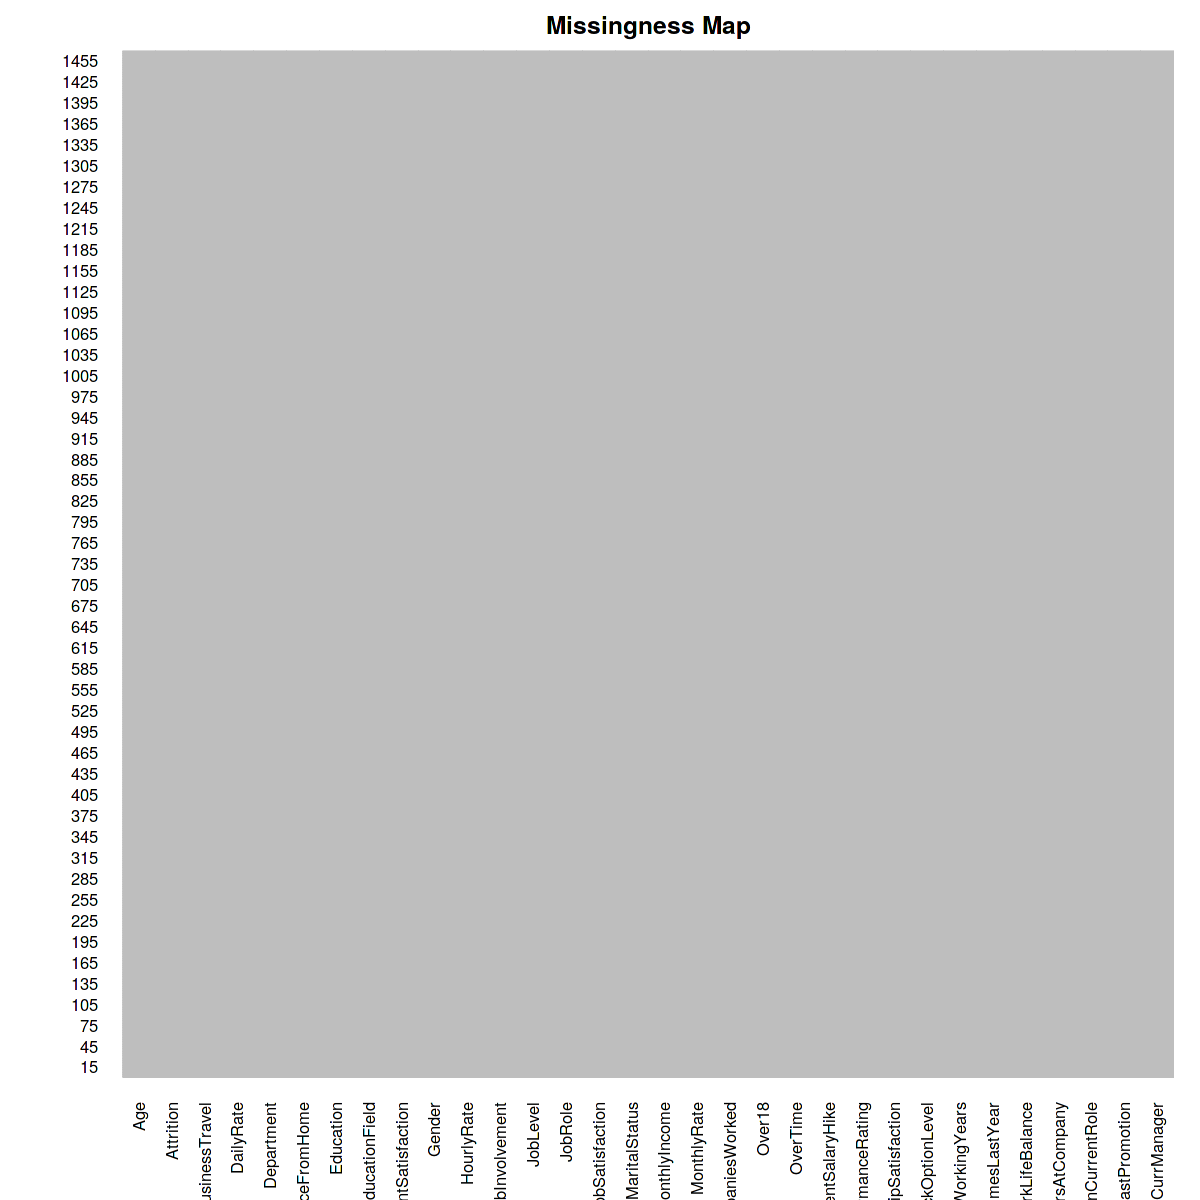

In [12]:
fig(10,10)
missmap(df, rank.order = FALSE, col = c(0,8), legend = FALSE)

### Exploratory Data Analysis
##### There can be a lot of plots that can be made for EDA. But we'll just go with some few plots that can help us.

##### Let's check the quantity plot of the Attrition Column, and see if we have a balanced dataset

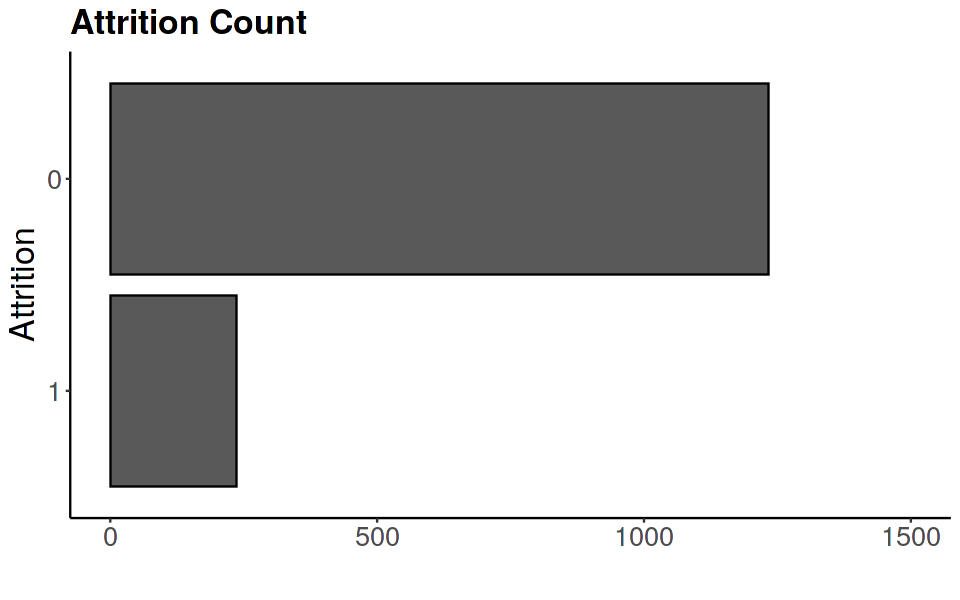

In [13]:
fig(8,5)
attrition_count <- ggplot(df, aes(x = Attrition)) + 
geom_bar(color="black",width = 0.9) +
coord_flip() + 
theme_classic() +
theme(text=element_text(size = 20,  family="sans")) + 
theme(legend.position = "none") + 
scale_y_continuous(name = " ", limits = c(0,1500)) + 
scale_x_discrete(limits = c("1","0")) +
ggtitle("Attrition Count") + 
theme(plot.title = element_text(size = 20, face = "bold"))
attrition_count

##### This is obviously not a balanced dataset. There are lots of techniques to handle this kind of data, but for the sole purpose of demonstrating Logistic Regression, we'll leave this as is.

##### Lets have a quick check in some of relationships in our dataset

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



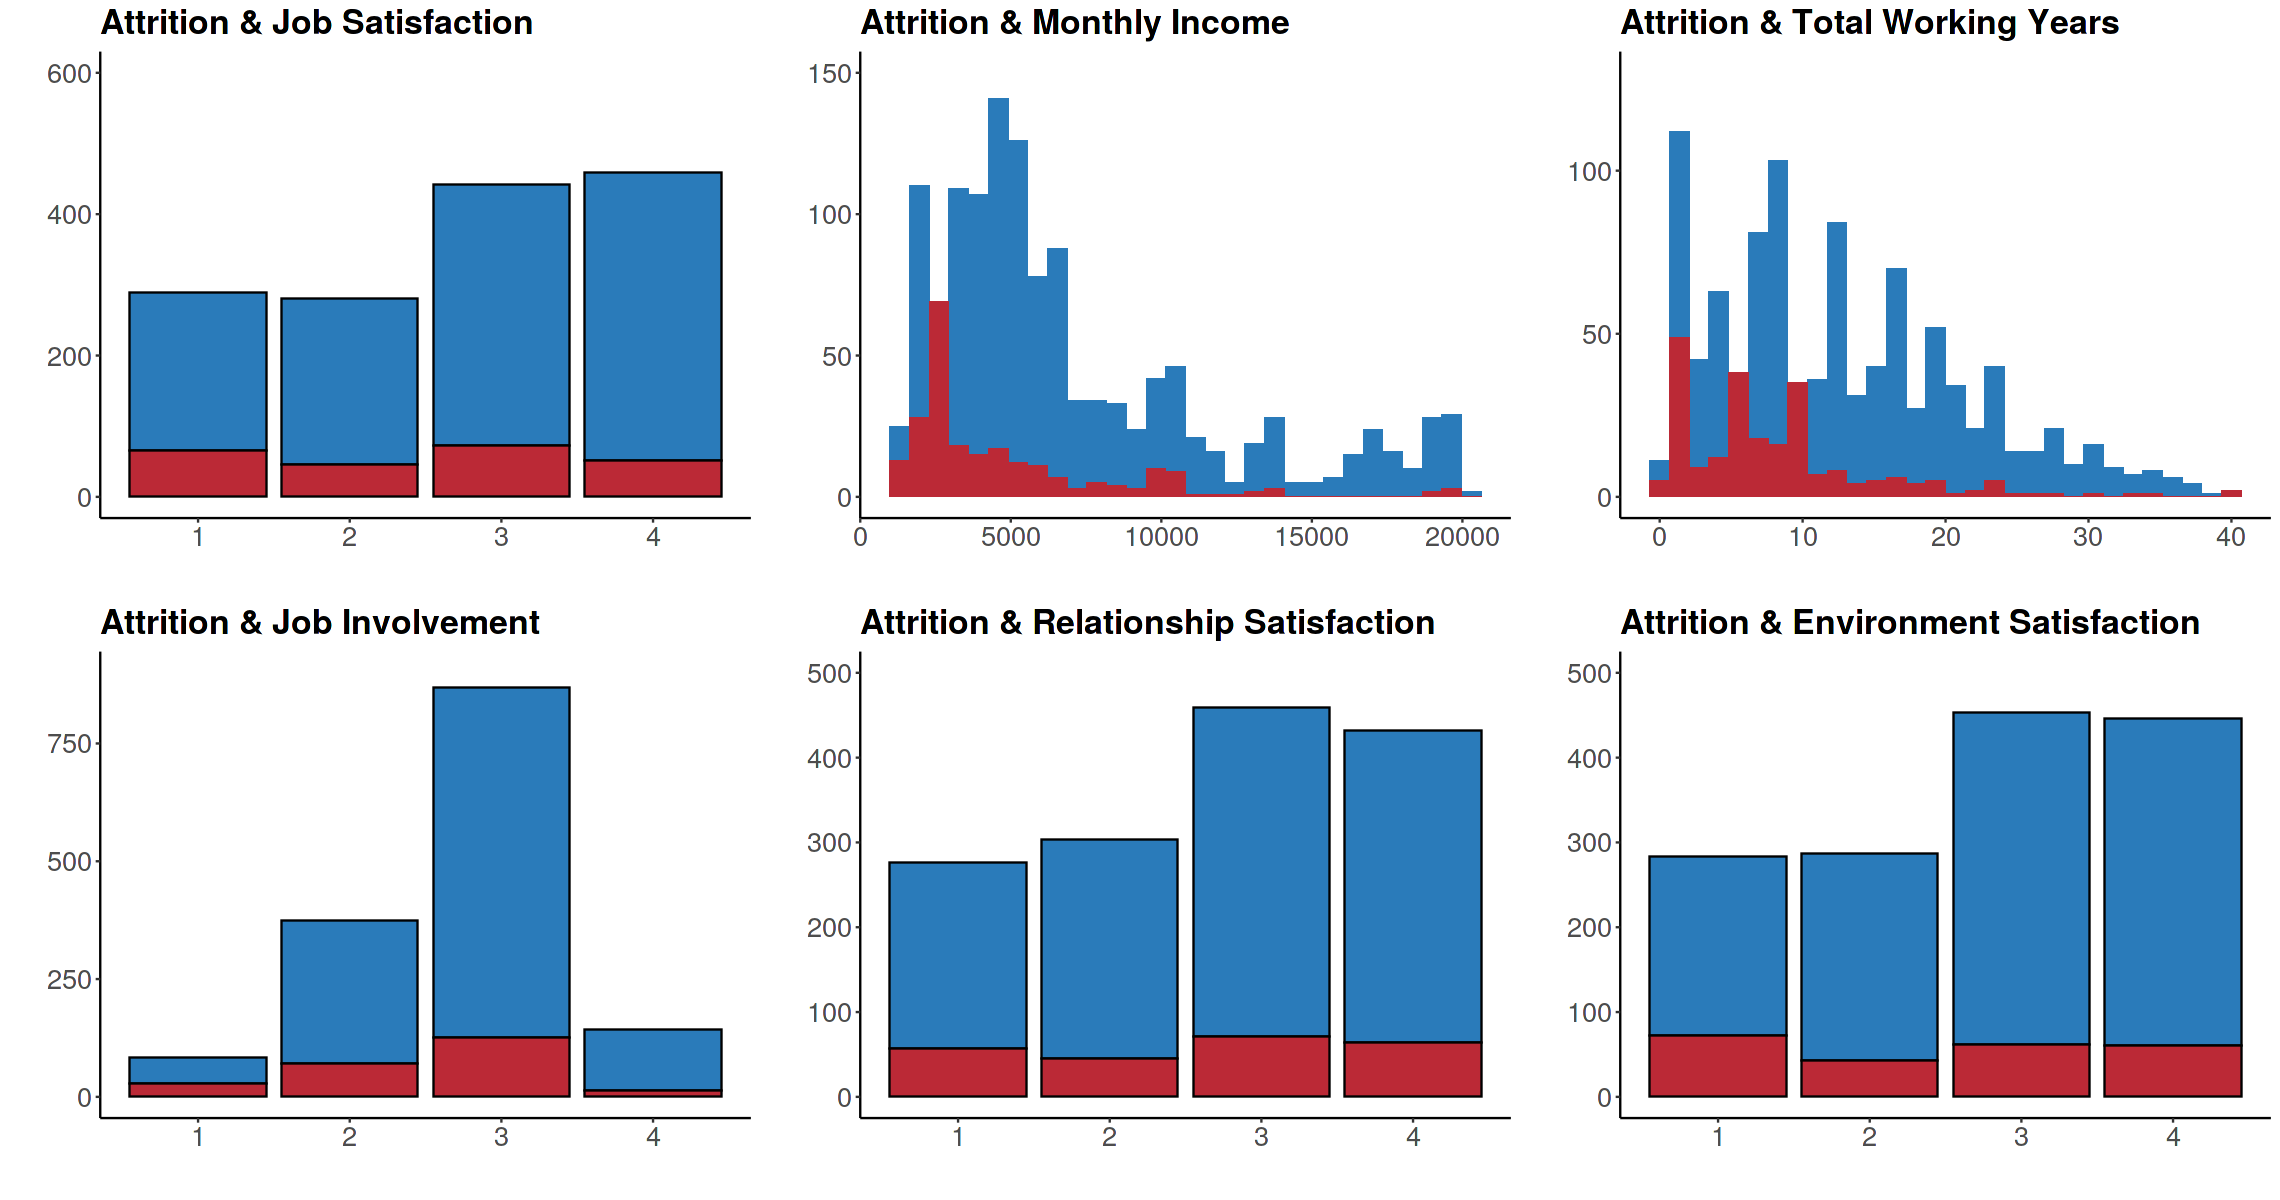

In [14]:
fig(19,10)
warning=FALSE
#JobSatisfaction & Attrition
attperjs <- ggplot(df, aes(x = JobSatisfaction, fill = Attrition)) +
scale_fill_manual(values = c("1" = "#BB2936","0"="#2A7BBA")) +
geom_bar(color = "black", width = 0.9) +
theme_classic() +
theme(text=element_text(size=20,  family="sans")) + 
theme(legend.position = "none") +
scale_y_continuous(name = " ", limits = c(0, 600)) +
scale_x_continuous(name = " ") +
ggtitle("Attrition & Job Satisfaction") + 
theme(plot.title = element_text(size = 20, face = "bold"))

#MonthlyIncome & Attrition
attperm <- ggplot(df, aes(x = MonthlyIncome, fill = Attrition)) +
scale_fill_manual(values = c("1" = "#BB2936","0"="#2A7BBA")) +
geom_histogram(values = c("1" = "#BB2936","0"="#2A7BBA")) +
theme_classic() +
theme(text=element_text(size=20,  family="sans")) + 
theme(legend.position = "none") +
scale_y_continuous(name = " ", limits = c(0, 150)) +
scale_x_continuous(name = " ") +
ggtitle("Attrition & Monthly Income ") + 
theme(plot.title = element_text(size = 20, face = "bold"))

#TotalWorkingYears & Attrition
attperwy <- ggplot(df, aes(x = TotalWorkingYears, fill = Attrition)) +
scale_fill_manual(values = c("1" = "#BB2936","0"="#2A7BBA")) +
geom_histogram(values = c("1" = "#BB2936","0"="#2A7BBA")) +
theme_classic() +
theme(text=element_text(size=20,  family="sans")) + 
theme(legend.position = "none") +
scale_y_continuous(name = " ", limits = c(0, 130)) +
scale_x_continuous(name = " ") +
ggtitle("Attrition & Total Working Years ") + 
theme(plot.title = element_text(size = 20, face = "bold"))

#JobInvolvement & Attrition
attperji <- ggplot(df, aes(x = JobInvolvement, fill = Attrition)) +
scale_fill_manual(values = c("1" = "#BB2936","0"="#2A7BBA")) +
geom_bar(color = "black", width = 0.9) +
theme_classic() +
theme(text=element_text(size=20,  family="sans")) + 
theme(legend.position = "none") +
scale_y_continuous(name = " ", limits = c(0, 900)) +
scale_x_continuous(name = " ") +
ggtitle("Attrition & Job Involvement") + 
theme(plot.title = element_text(size = 20, face = "bold"))

#RelationshipSatisfaction & Attrition
attperrs <- ggplot(df, aes(x = RelationshipSatisfaction, fill = Attrition)) +
scale_fill_manual(values = c("1" = "#BB2936","0"="#2A7BBA")) +
geom_bar(color = "black", width = 0.9) +
theme_classic() +
theme(text=element_text(size=20,  family="sans")) + 
theme(legend.position = "none") +
scale_y_continuous(name = " ", limits = c(0, 500)) +
scale_x_continuous(name = " ") +
ggtitle("Attrition & Relationship Satisfaction ") + 
theme(plot.title = element_text(size = 20, face = "bold"))

#EnvironmentSatisfaction & Attrition
attperes <- ggplot(df, aes(x = EnvironmentSatisfaction, fill = Attrition)) +
scale_fill_manual(values = c("1" = "#BB2936","0" = "#2A7BBA")) +
geom_bar(color = "black", width = 0.9) +
theme_classic() +
theme(text=element_text(size = 20,  family = "sans")) + 
theme(legend.position = "none") +
scale_y_continuous(name = " ", limits = c(0, 500)) +
scale_x_continuous(name = " ") +
ggtitle("Attrition & Environment Satisfaction ") + 
theme(plot.title = element_text(size = 20, face = "bold"))

grid.arrange(attperjs, attperm, attperwy, attperji, attperrs, attperes, ncol = 3, nrow = 2)

##### Some alluvial plots (You can make your own. This is just for future use)

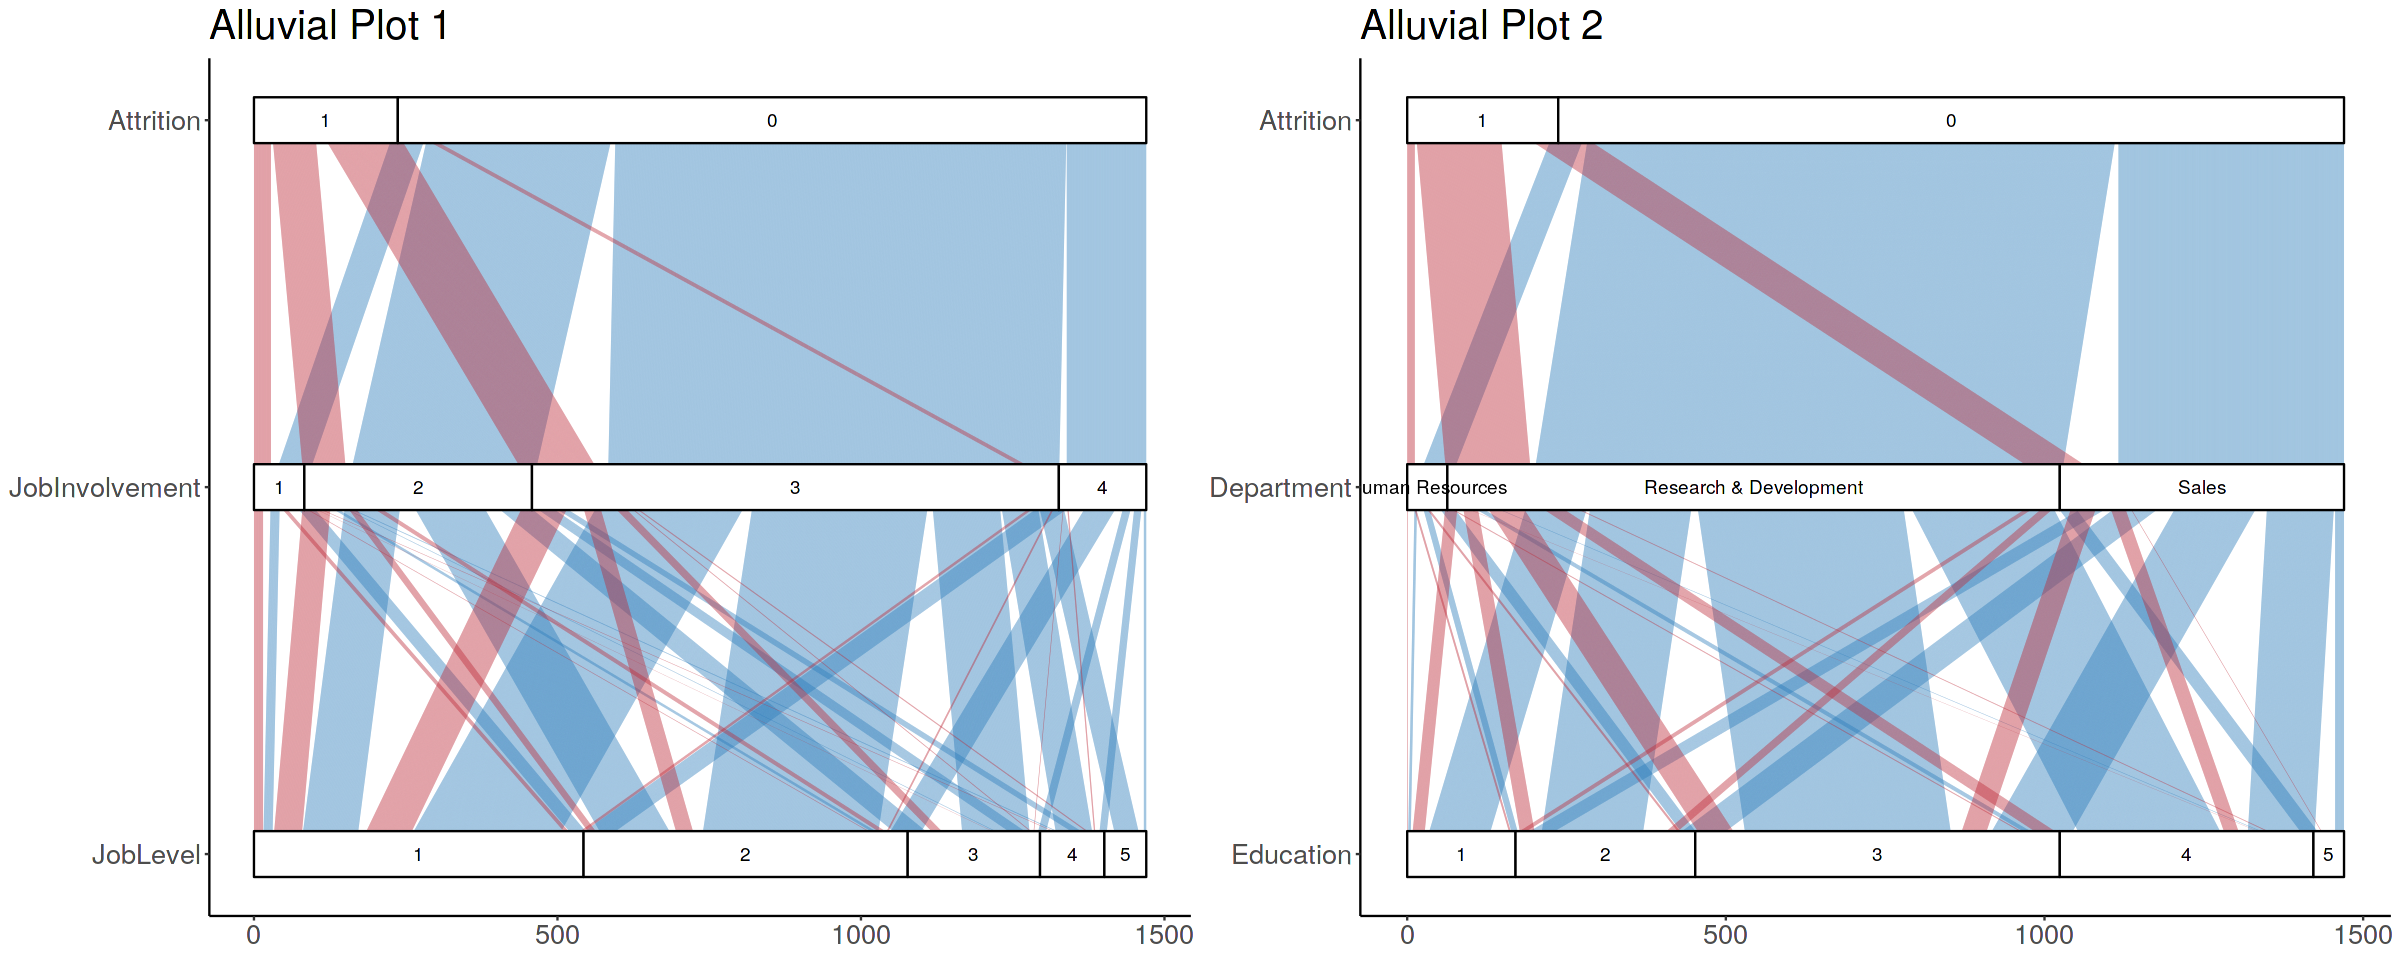

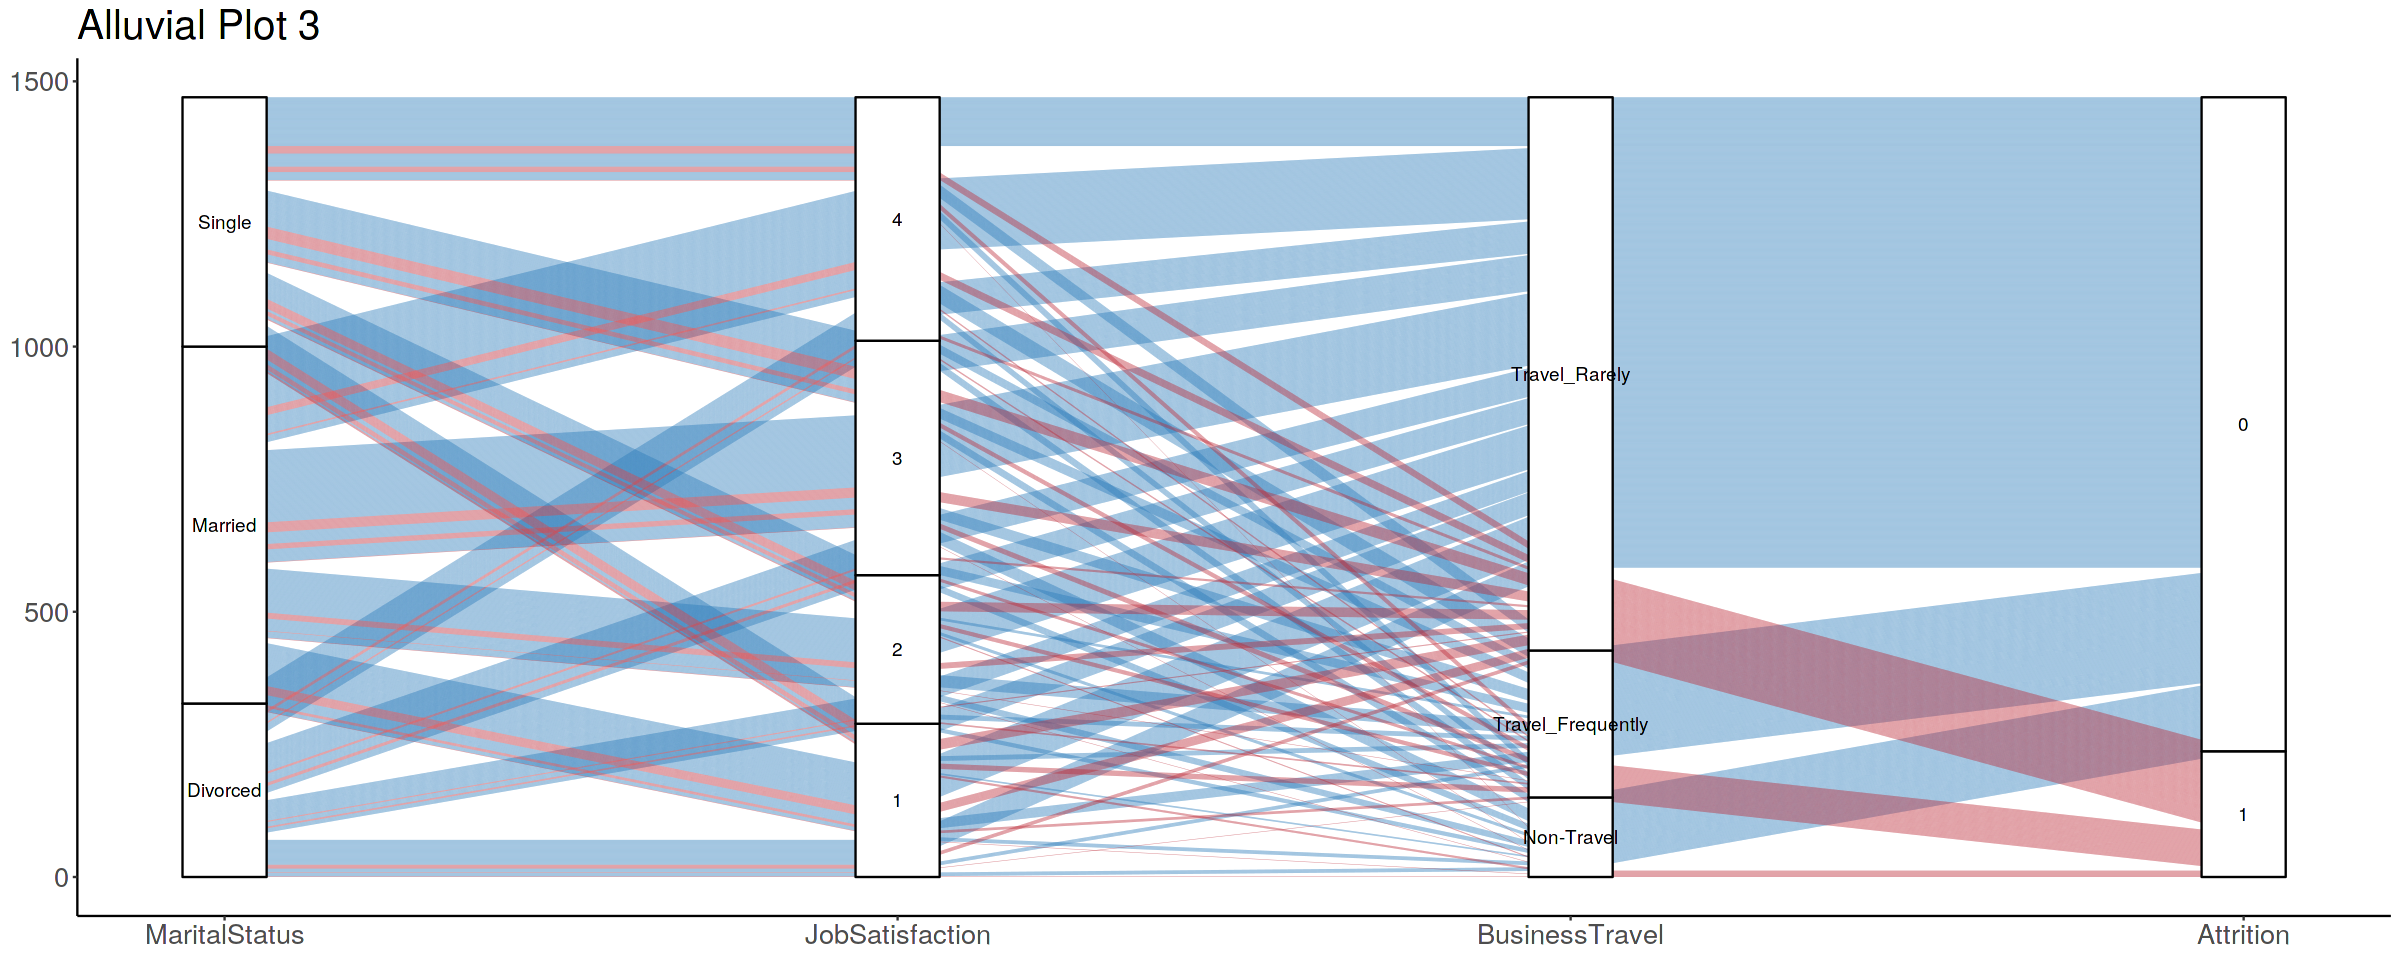

In [15]:
fig(20,8)
warning=FALSE
alluvial1 <- ggplot(df, aes(axis1 = JobLevel, 
                            axis2 = JobInvolvement, 
                            axis3 = Attrition)) + 
geom_alluvium(aes(fill = Attrition), width = 0, knot.pos = 0, reverse = FALSE) +
scale_fill_manual(values = c("1" = "#BB2936","0"="#2A7BBA")) +
guides(fill = FALSE) +
geom_stratum(width = 1/8, reverse = FALSE) +
geom_text(stat = "stratum", infer.label = TRUE, reverse = FALSE) +
scale_x_continuous(breaks = 1:3, labels = c("JobLevel", "JobInvolvement", "Attrition")) +
coord_flip() +
theme_classic() +
theme(text=element_text(size=20,  family="sans")) + 
ggtitle("Alluvial Plot 1")



alluvial2 <- ggplot(df, aes(axis1 = Education, 
                            axis2 = Department, 
                            axis3 = Attrition)) + 
geom_alluvium(aes(fill = Attrition), width = 0, knot.pos = 0, reverse = FALSE) +
scale_fill_manual(values = c("1" = "#BB2936","0"="#2A7BBA")) +
guides(fill = FALSE) +
geom_stratum(width = 1/8, reverse = FALSE) +
geom_text(stat = "stratum", infer.label = TRUE, reverse = FALSE) +
scale_x_continuous(breaks = 1:3, labels = c("Education", "Department", "Attrition")) +
coord_flip() +
theme_classic() +
theme(text=element_text(size=20,  family="sans")) + 
ggtitle("Alluvial Plot 2")


alluvial3 <- ggplot(df, aes(axis1 = MaritalStatus, 
                            axis2 = JobSatisfaction,
                            axis3 = BusinessTravel,
                            axis4 = Attrition)) + 
geom_alluvium(aes(fill = Attrition), width = 0, knot.pos = 0, reverse = FALSE) +
scale_fill_manual(values = c("1" = "#BB2936","0"="#2A7BBA")) +
guides(fill = FALSE) +
geom_stratum(width = 1/8, reverse = FALSE) +
geom_text(stat = "stratum", infer.label = TRUE, reverse = FALSE) +
scale_x_continuous(breaks = 1:4, labels = c("MaritalStatus", "JobSatisfaction", "BusinessTravel","Attrition")) +
theme_classic() +
theme(text=element_text(size=20,  family="sans")) + 
ggtitle("Alluvial Plot 3")

grid.arrange(alluvial1, alluvial2, ncol = 2, nrow = 1)
alluvial3

## Logistic Regression

### Split to train & test

In [16]:
set.seed(823)
split <- sample.split(df, SplitRatio = 0.75)
train <- subset(df, split == "TRUE")
test <- subset(df, split == "FALSE")
str(train)
str(test)

'data.frame':	1102 obs. of  32 variables:
 $ Age                     : int  41 49 37 33 27 30 38 36 34 29 ...
 $ Attrition               : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 3 2 3 3 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1358 216 1299 1346 1389 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 24 23 27 19 21 ...
 $ Education               : int  2 1 2 4 1 1 3 3 2 4 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 2 4 4 2 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 4 3 2 2 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 2 2 2 1 ...
 $ HourlyRate              : int  94 61 92 56 40 67 44 94 93 51 ...
 $ JobInvolvement          : int  3 2 2 3 3 3 2 3 3 4 ...
 $ JobLevel                : int 

### Check for MultiCollinearities on Numeric Variables

##### Visualize using Correlation Plot

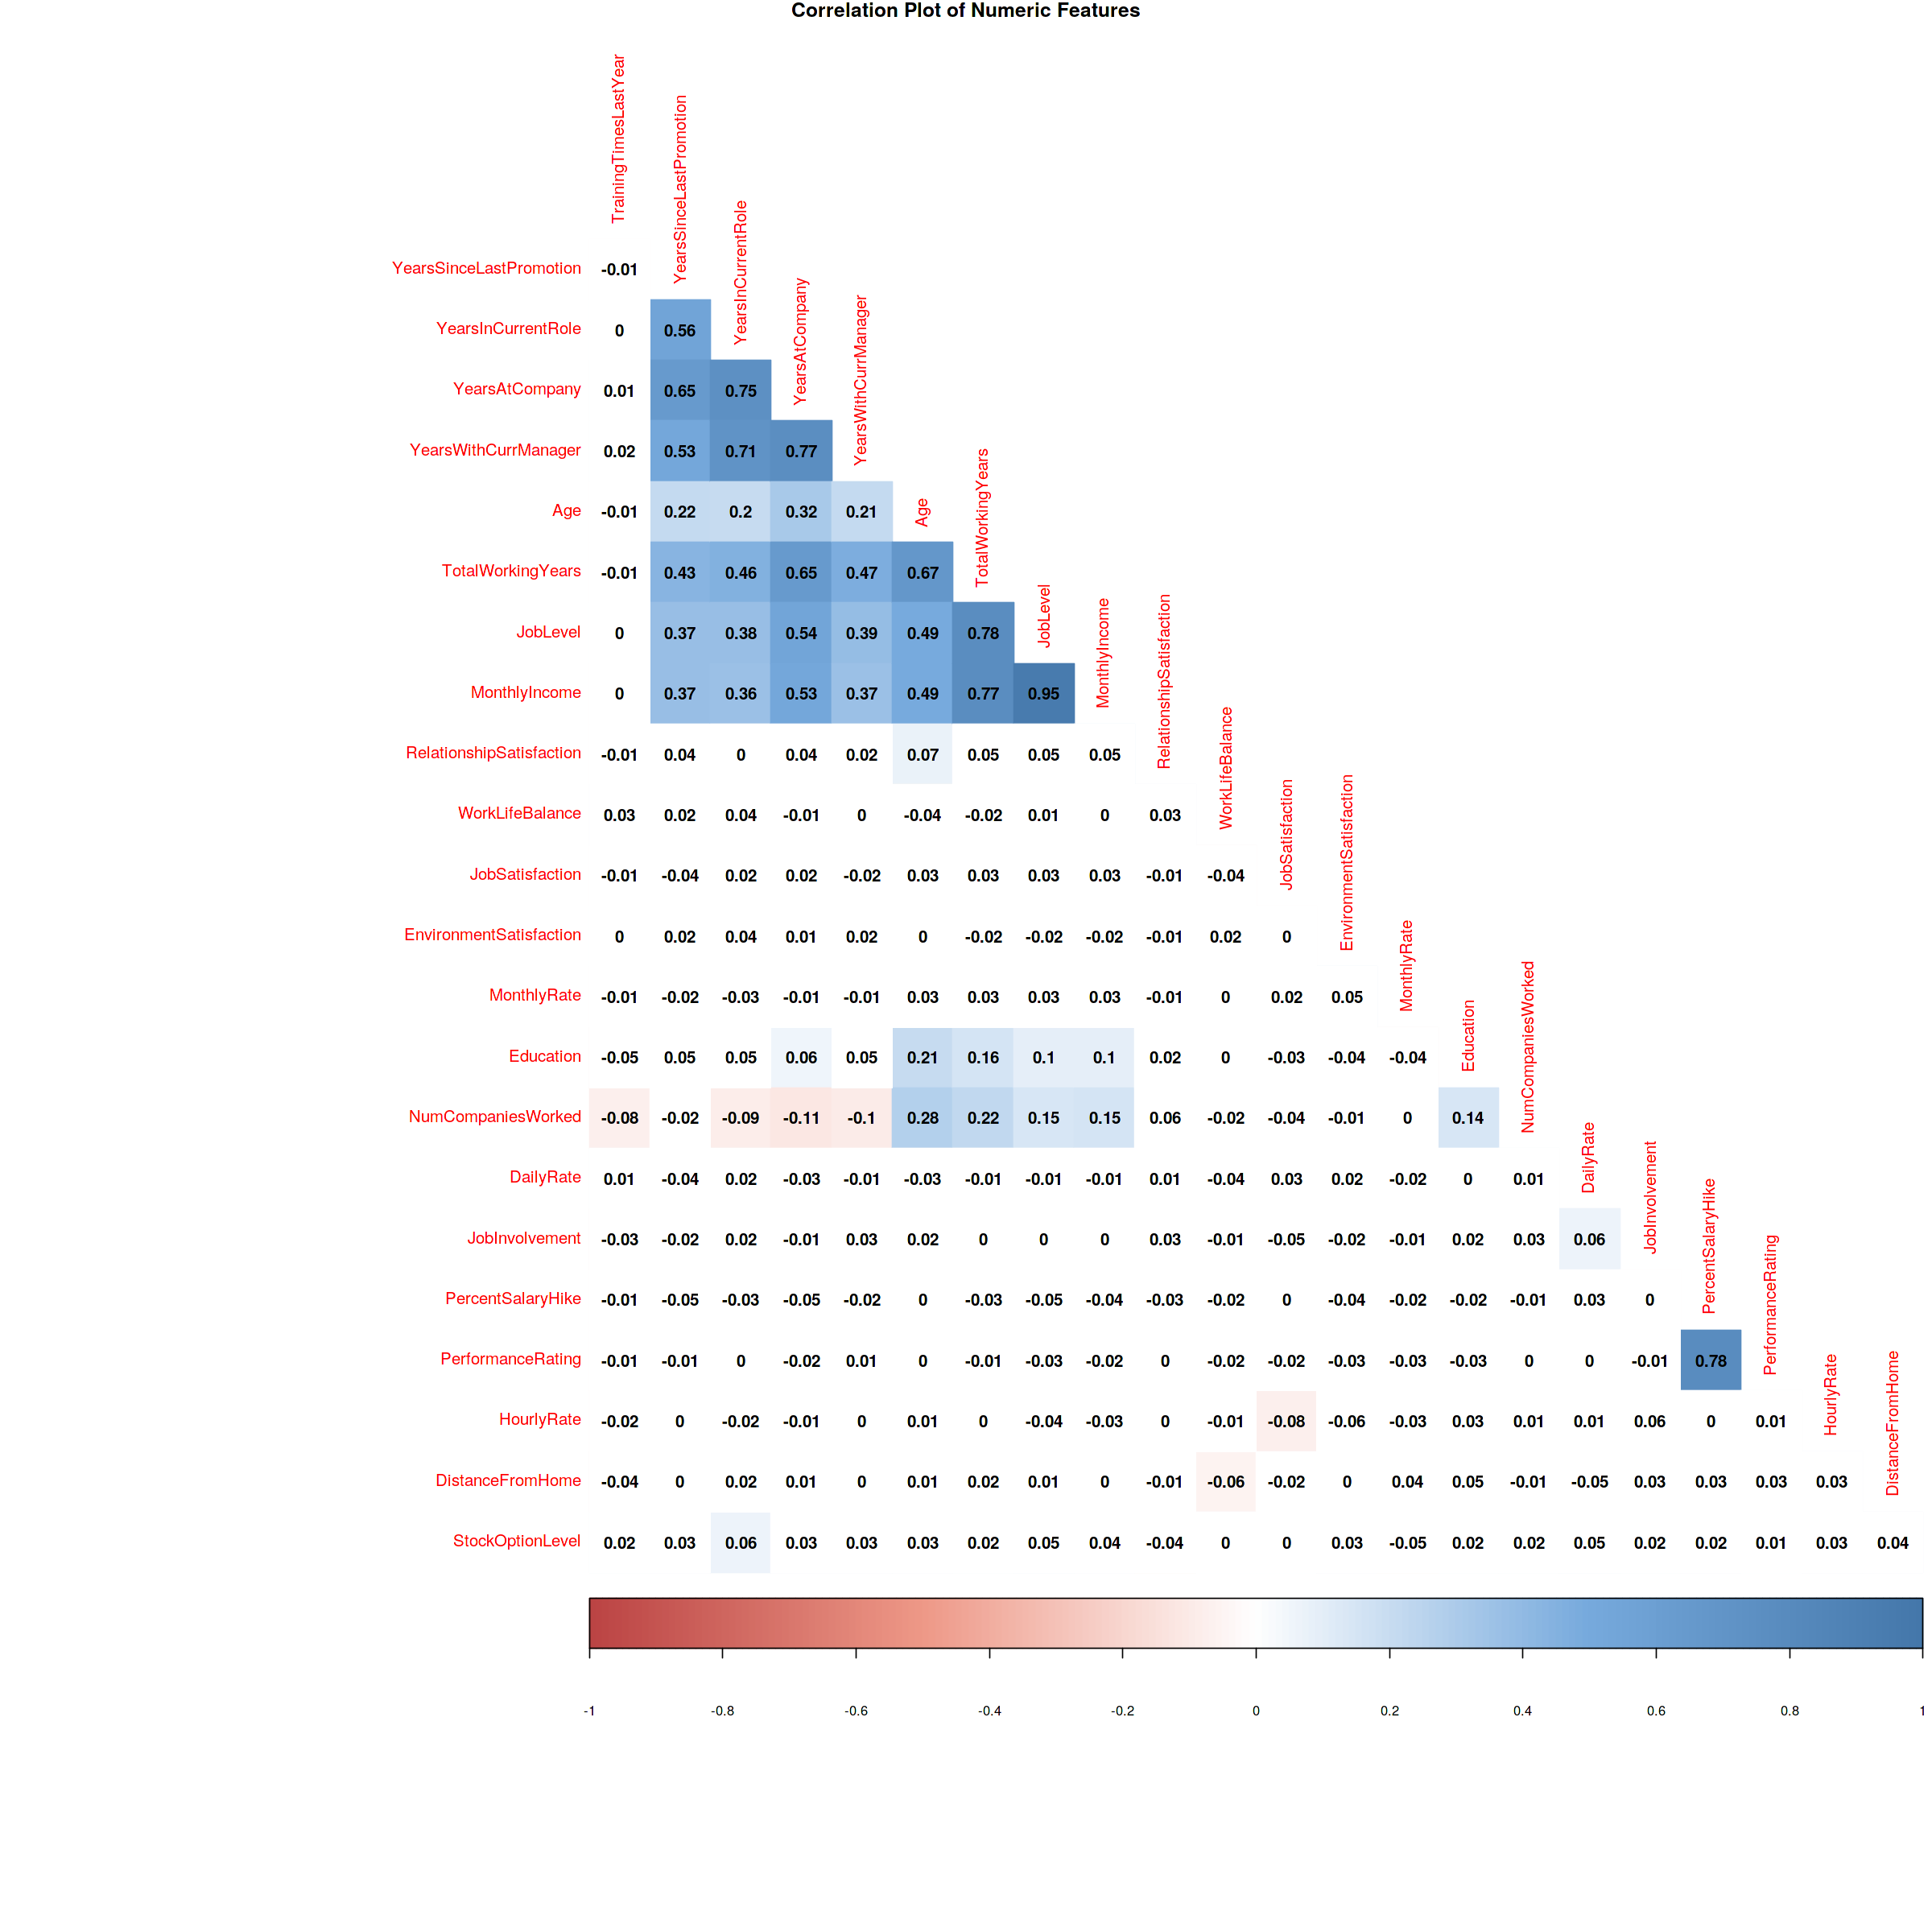

In [17]:
fig(20,20)
numerics <- unlist(lapply(train, is.numeric))
numerics <- train[,numerics]

cor.mtest <- function(mat, ...) {
  mat <- as.matrix(mat)
  n <- ncol(mat)
  p.mat<- matrix(NA, n, n)
  diag(p.mat) <- 0
  for (i in 1:(n - 1)) {
    for (j in (i + 1):n) {
      tmp <- cor.test(mat[, i], mat[, j], ...)
      p.mat[i, j] <- p.mat[j, i] <- tmp$p.value
    }
  }
  colnames(p.mat) <- rownames(p.mat) <- colnames(mat) 
  p.mat
}
 M <- cor(numerics)
 p.mat <- cor.mtest(numerics)
 
 title <- "Correlation Plot of Numeric Features"
 col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
 corrplot(M, method="color", col=col(200),  
          diag=FALSE,
          type="lower", order="hclust", 
          title = title, 
          addCoef.col = "black",
          p.mat = p.mat, sig.level = 0.05, insig = "blank", 
          mar=c(0,0,1,0) 
 )

##### We eliminate variables with high Variannce Inflation Factor (VIF). VIF is one measure to detect multicollinearities between the independent variables of your model. The general idea behind is to create a linear model with one particular variable as your dependent variable and all the others as your independent variable. If there is a goodness of the fit, then there is likely to be a multicollinearity issue, which is represented by a high VIF value. In practice, a VIF of > 5 represents multicollinearity.

In [18]:
dummy_model <- glm(train$Attrition~., data = numerics, family = "binomial")
print(vif(dummy_model))

                     Age                DailyRate         DistanceFromHome 
                1.809936                 1.029129                 1.044146 
               Education  EnvironmentSatisfaction               HourlyRate 
                1.084771                 1.030997                 1.022799 
          JobInvolvement                 JobLevel          JobSatisfaction 
                1.033869                 8.073950                 1.029349 
           MonthlyIncome              MonthlyRate       NumCompaniesWorked 
                7.903879                 1.034876                 1.281180 
       PercentSalaryHike        PerformanceRating RelationshipSatisfaction 
                2.802295                 2.784073                 1.024850 
        StockOptionLevel        TotalWorkingYears    TrainingTimesLastYear 
                1.037612                 4.208041                 1.014210 
         WorkLifeBalance           YearsAtCompany       YearsInCurrentRole 
            

##### We'll remove MonthlyIncome variable since it has a VIF of 8.127 which is greater than 5.

In [19]:
train <- subset(train, select = - c(MonthlyIncome))
test <- subset(test, select = - c(MonthlyIncome))

##### We'll check again for the new VIFs:

In [20]:
numerics <- unlist(lapply(train, is.numeric))
numerics <- train[,numerics]
dummy_model <- glm(train$Attrition~., data = numerics, family = "binomial")
print(vif(dummy_model))

                     Age                DailyRate         DistanceFromHome 
                1.820004                 1.027063                 1.040745 
               Education  EnvironmentSatisfaction               HourlyRate 
                1.083510                 1.030530                 1.021512 
          JobInvolvement                 JobLevel          JobSatisfaction 
                1.033493                 2.294474                 1.029925 
             MonthlyRate       NumCompaniesWorked        PercentSalaryHike 
                1.033596                 1.270672                 2.801575 
       PerformanceRating RelationshipSatisfaction         StockOptionLevel 
                2.782278                 1.023627                 1.037267 
       TotalWorkingYears    TrainingTimesLastYear          WorkLifeBalance 
                4.252355                 1.014382                 1.026829 
          YearsAtCompany       YearsInCurrentRole  YearsSinceLastPromotion 
            

##### We'll remove YearsAtCompany variable since it has a VIF of 5.68 which is greater than 5.

In [21]:
train <- subset(train, select = - c(YearsAtCompany))
test <- subset(test, select = - c(YearsAtCompany))

##### We'll check again for the new VIFs:

In [22]:
numerics <- unlist(lapply(train, is.numeric))
numerics <- train[,numerics]
dummy_model <- glm(train$Attrition~., data = numerics, family = "binomial")
print(vif(dummy_model))

                     Age                DailyRate         DistanceFromHome 
                1.815499                 1.026910                 1.039277 
               Education  EnvironmentSatisfaction               HourlyRate 
                1.082307                 1.028805                 1.019641 
          JobInvolvement                 JobLevel          JobSatisfaction 
                1.031361                 2.241299                 1.027365 
             MonthlyRate       NumCompaniesWorked        PercentSalaryHike 
                1.033431                 1.215778                 2.803871 
       PerformanceRating RelationshipSatisfaction         StockOptionLevel 
                2.784360                 1.021863                 1.037538 
       TotalWorkingYears    TrainingTimesLastYear          WorkLifeBalance 
                3.738044                 1.014565                 1.024357 
      YearsInCurrentRole  YearsSinceLastPromotion     YearsWithCurrManager 
            

##### Now everything is set, we can now proceed to the next step.

### Feature Selection

##### For feature selection, we're gonna use the variable importance plot from the random forest library. I find this an efficient and reliable way of removing some of the variables to create a better model

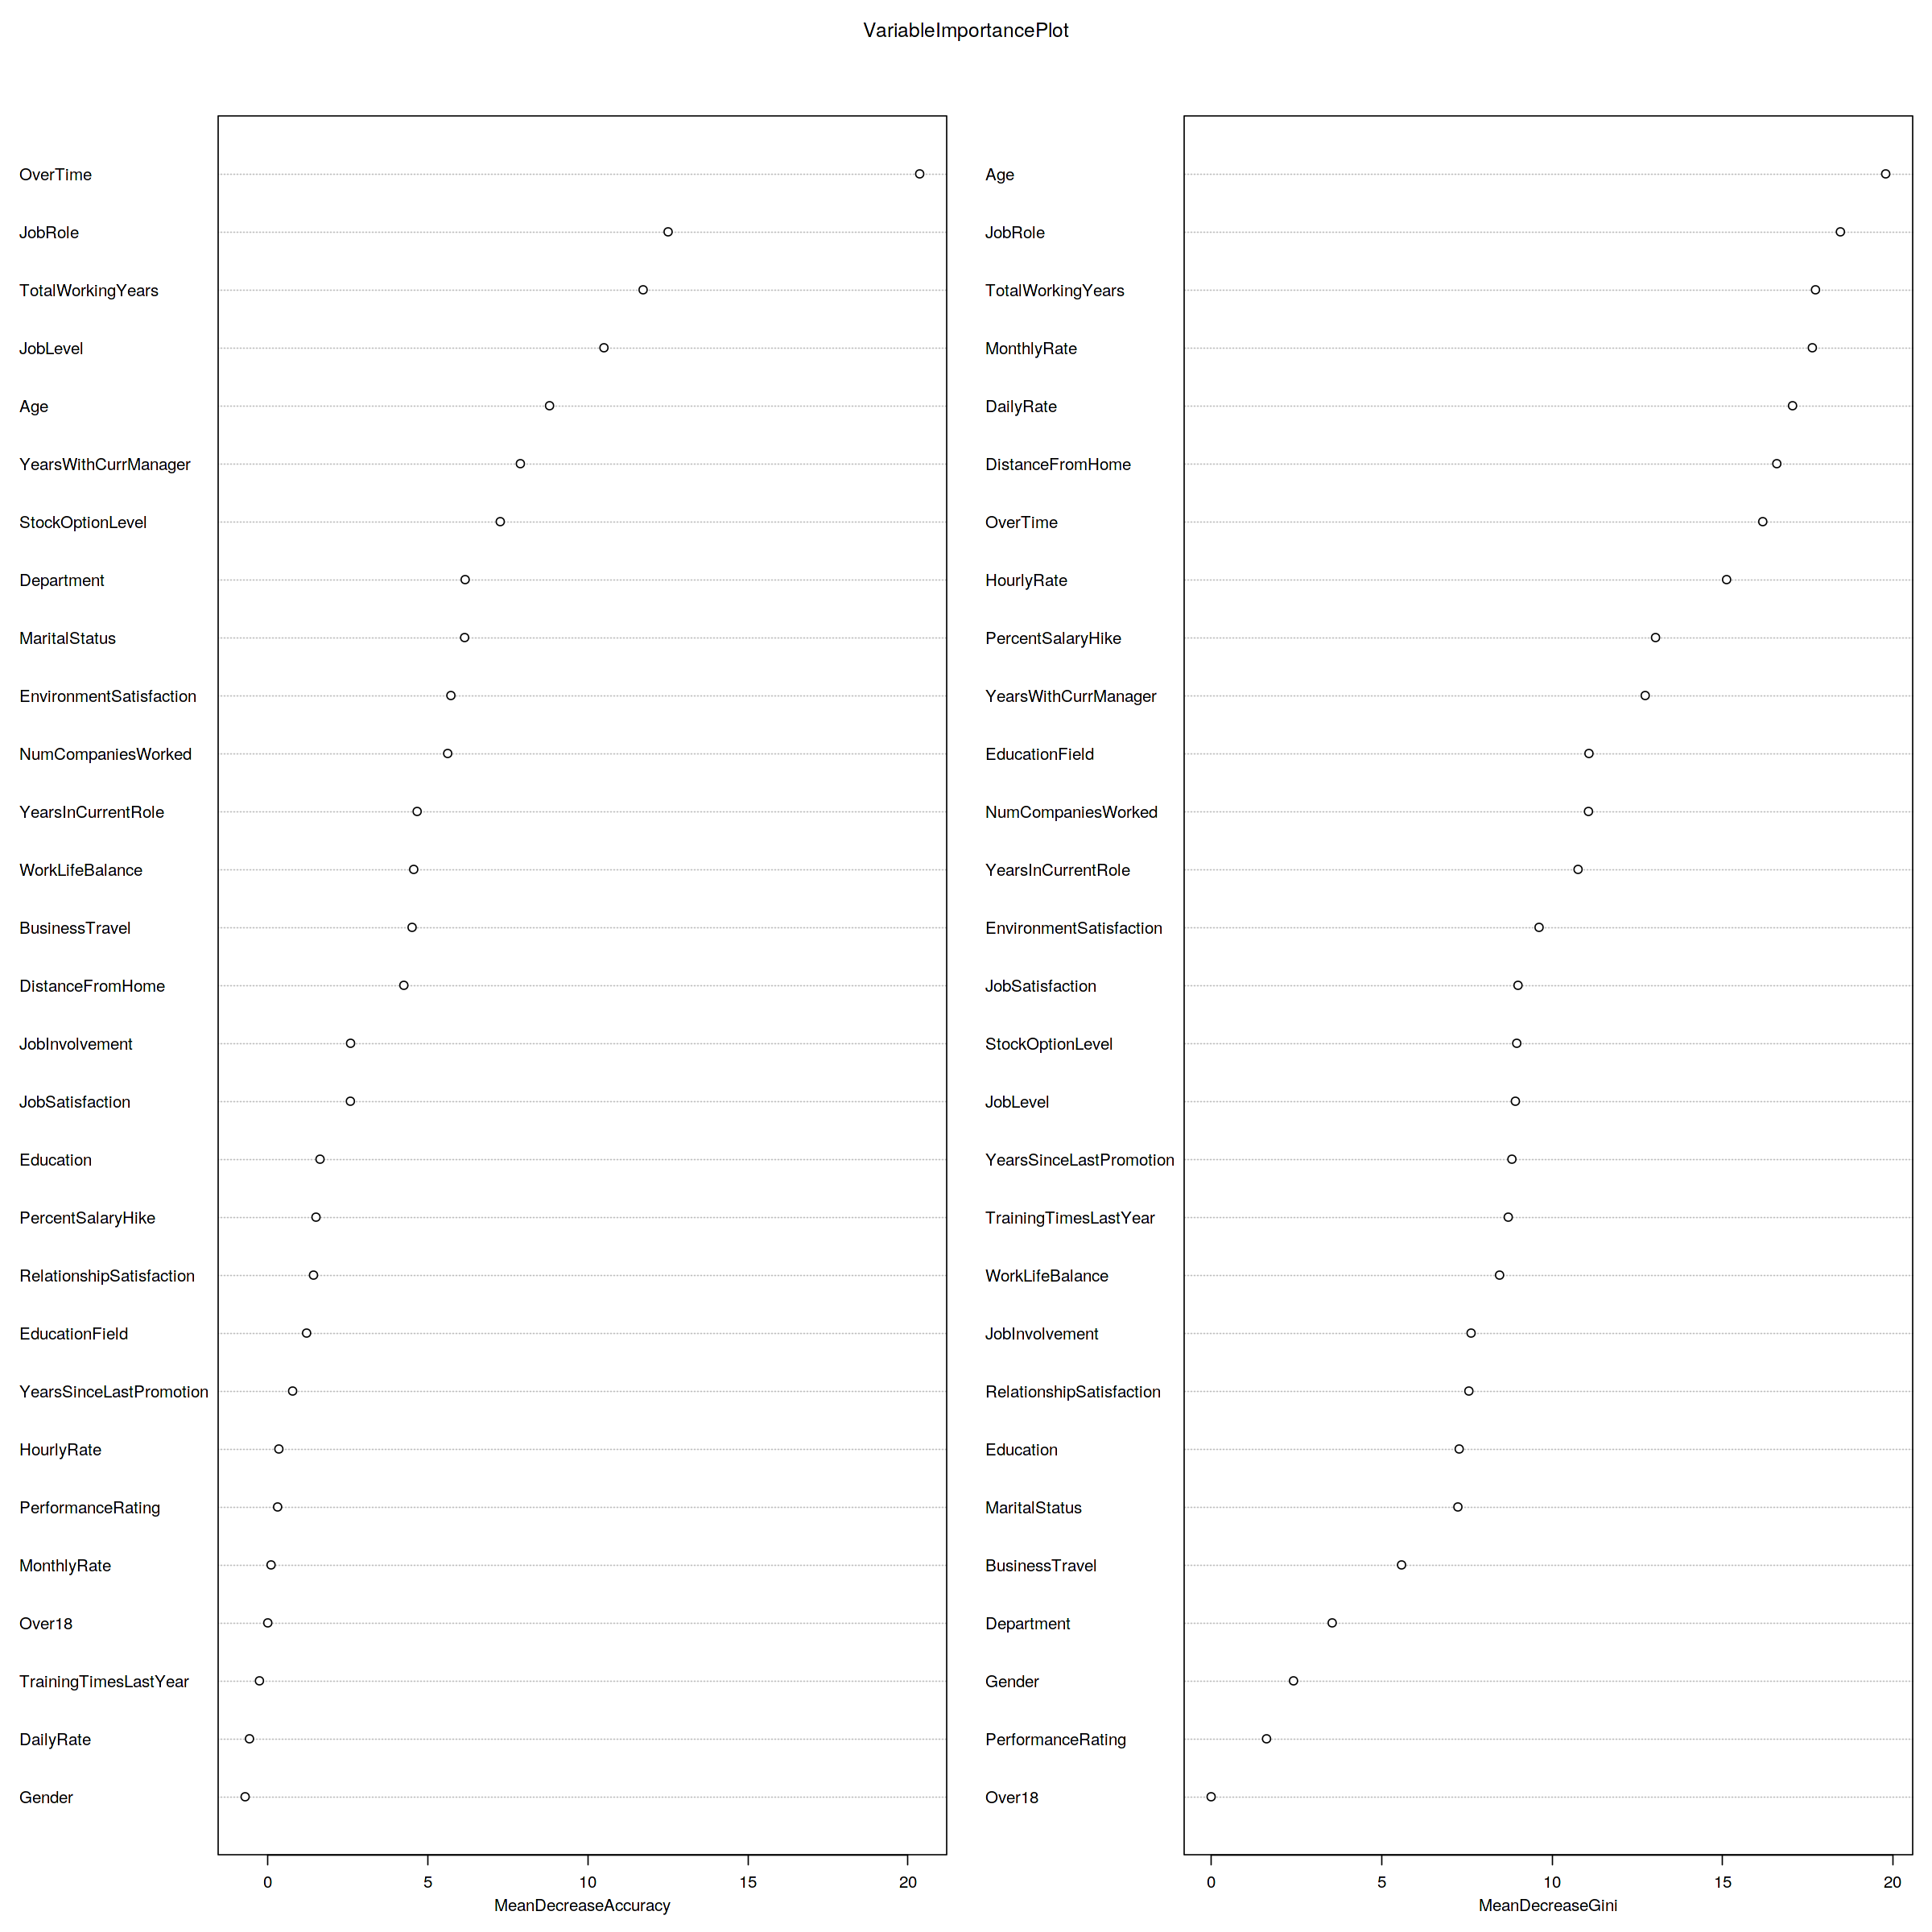

In [23]:
set.seed(823)
VariableImportancePlot <- randomForest(as.factor(Attrition) ~. , data = train, importance=TRUE)
varImpPlot(VariableImportancePlot)

##### Let's try to get the first 15 variables from the MeanDecreaseAccuracy Plot. This plot describes how suitable it is for a variable to be a predictor

In [24]:
train <- subset(train, select = - c(JobInvolvement,
                                    JobSatisfaction,
                                    Education,
                                    PercentSalaryHike,
                                    RelationshipSatisfaction,
                                    EducationField,
                                    YearsSinceLastPromotion,
                                    HourlyRate,
                                    PerformanceRating,
                                    Over18,
                                    TrainingTimesLastYear,
                                    DailyRate,
                                    Gender))
test <- subset(test, select = - c(JobInvolvement,
                                  JobSatisfaction,
                                   Education,
                                   PercentSalaryHike,
                                   RelationshipSatisfaction,
                                   EducationField,
                                   YearsSinceLastPromotion,
                                   HourlyRate,
                                   PerformanceRating,
                                   Over18,
                                   TrainingTimesLastYear,
                                   DailyRate,
                                   Gender))

### Create the Model

In [25]:
finalGlm <- glm(Attrition~., data = train, family = "binomial")
print(finalGlm)


Call:  glm(formula = Attrition ~ ., family = "binomial", data = train)

Coefficients:
                     (Intercept)                               Age  
                      -1.498e+01                        -3.690e-02  
 BusinessTravelTravel_Frequently       BusinessTravelTravel_Rarely  
                       1.264e+00                         5.858e-01  
DepartmentResearch & Development                   DepartmentSales  
                       1.349e+01                         1.310e+01  
                DistanceFromHome           EnvironmentSatisfaction  
                       3.653e-02                        -3.086e-01  
                        JobLevel             JobRolehumanresources  
                       2.062e-01                         1.494e+01  
     JobRolelaboratorytechnician                    JobRolemanager  
                       1.474e+00                        -5.106e-02  
    JobRolemanufacturingdirector           JobRoleresearchdirector  
                

### Predict on the Test Set

##### We set the threshold normally to be 0.5. But this can be adjusted.

In [26]:
thresh <- 0.5
predictedAttritionNumLog <- predict(finalGlm,newdata=test,type='response')
predictedAttritionLog <- ifelse(predictedAttritionNumLog > thresh,1,0) 
test$predictedAttrition <- predictedAttritionLog

### Evaluate the Model

##### A. Confusion Matrix

Confusion Matrix and Statistics

   
      0   1
  0 302  10
  1  36  20
                                         
               Accuracy : 0.875          
                 95% CI : (0.8368, 0.907)
    No Information Rate : 0.9185         
    P-Value [Acc > NIR] : 0.9984255      
                                         
                  Kappa : 0.4016         
                                         
 Mcnemar's Test P-Value : 0.0002278      
                                         
            Sensitivity : 0.8935         
            Specificity : 0.6667         
         Pos Pred Value : 0.9679         
         Neg Pred Value : 0.3571         
             Prevalence : 0.9185         
         Detection Rate : 0.8207         
   Detection Prevalence : 0.8478         
      Balanced Accuracy : 0.7801         
                                         
       'Positive' Class : 0              
                                         
         Sensitivity          Specificity    

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



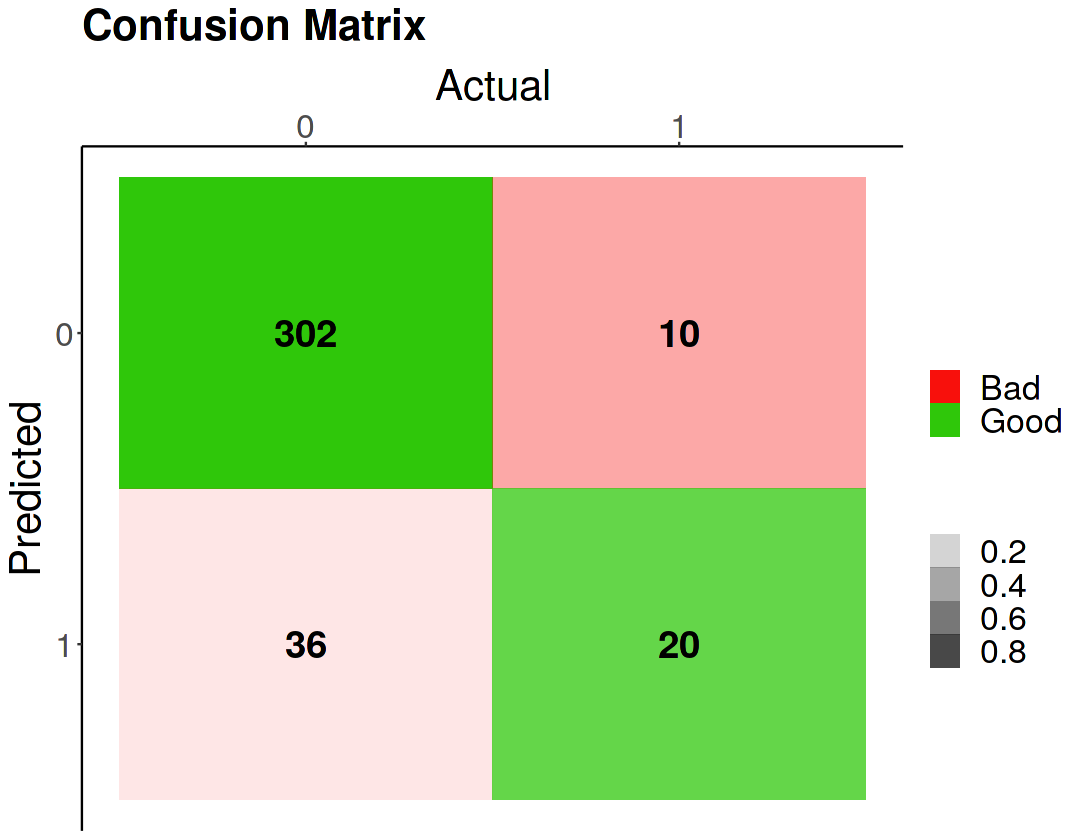

In [27]:
fig(9,7)
warning=FALSE
cm <- confusionMatrix(table(test$Attrition,test$predictedAttrition))
test$predictedAttrition <- as.factor(test$predictedAttrition)

table <- data.frame(confusionMatrix(test$Attrition, test$predictedAttrition)$table)
print(cm)
print(cm$byClass)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "Good", "Bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

confusionMatrix <- ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 25, size = 8) +
  scale_fill_manual(name = " ", values = c(Good = "#2FC70A", Bad = "#F8100C")) +
  scale_alpha(name = " ") +
  theme_classic() +
  xlim(rev(levels(table$Reference))) +
  scale_y_discrete(name = "Predicted", limits = c("1","0")) + 
  scale_x_discrete(name = "Actual", position = "top") +
  #theme(legend.position = " ") +
  theme(text=element_text(size=25,  family="sans")) + 
  ggtitle("Confusion Matrix") +
  theme(plot.title = element_text(size = 25, family="sans", face = "bold"))
  
confusionMatrix

##### B. ROC Curve & AUC

##### When dealing with a highly imbalanced dataset (wherein the number of 0’s and 1’s differs by a large margin), relying with accuracy as the sole measure for model performance is not a usually a good idea. A better alternative is the Receiver Operating Characteristic Curve (ROC Curve), and the area under it (AUC). ROC is a plot of signal (True Positive Rate) against noise (False Positive Rate). The model performance is determined by looking at the area under the ROC curve (or AUC). In simple terms, the higher the AUC, the better your model is at classifying 1 as 1 and 0 as 0.

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.8386


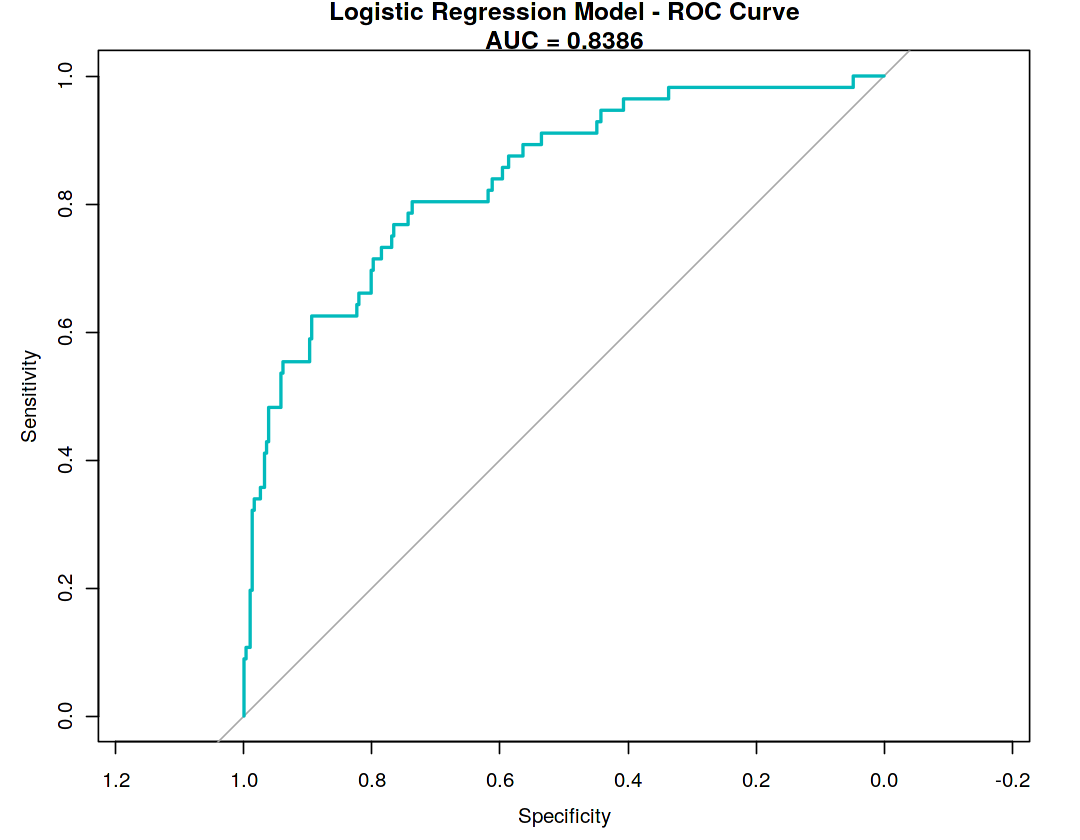

In [28]:
ROCLog <- roc(test$Attrition,predictedAttritionNumLog)
print(auc(ROCLog))
plot(ROCLog, col = "#02babc", family = "sans", cex = 2, main = "Logistic Regression Model - ROC Curve
AUC = 0.8386")

### Try - Optimal glmboost Model w/ Manual Hyperparameter Tuning

##### As another option, let's try a variant of glm - the boosted glm, and apply hyperparameter optimization. To know more about hyperparameter optimization, you can watch this youtube video: https://www.youtube.com/watch?v=xGZVxxvgzI4. This method will give us a model that is unlikely to overfit since it uses cross-validation to estimate the model's generalization performance.

In [29]:
set.seed(823)
fitControl <- trainControl(method = "repeatedcv", number = 10,         
                      verboseIter = FALSE, classProbs = TRUE)
hyperparams <- expand.grid(mstop = seq(1,400,25), 
                           prune = c('no','yes')) 
best_model_GlmboostM <- train(make.names(Attrition) ~ ., data = train,            
                    method = "glmboost",                     
                    trControl = fitControl,
                    tuneGrid = hyperparams)
best_model_GlmboostM
best_model_GlmboostM$bestTune

Boosted Generalized Linear Model 

1102 samples
  16 predictor
   2 classes: 'X0', 'X1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 1 times) 
Summary of sample sizes: 992, 992, 992, 992, 992, 992, ... 
Resampling results across tuning parameters:

  mstop  prune  Accuracy   Kappa    
    1    no     0.8357576  0.0000000
    1    yes    0.8357576  0.0000000
   26    no     0.8357576  0.0000000
   26    yes    0.8357576  0.0000000
   51    no     0.8411957  0.0591067
   51    yes    0.8411957  0.0591067
   76    no     0.8421130  0.0809980
   76    yes    0.8421130  0.0809980
  101    no     0.8448403  0.1052624
  101    yes    0.8448403  0.1052624
  126    no     0.8475594  0.1358049
  126    yes    0.8475594  0.1358049
  151    no     0.8493694  0.1524859
  151    yes    0.8493694  0.1524859
  176    no     0.8502621  0.1711915
  176    yes    0.8502621  0.1711915
  201    no     0.8548075  0.2114479
  201    yes    0.8548075  0.2114479
  226    no     0.8566257 

mstop prune
25 301   no

### Predict using the Optimized glmboost Model

In [30]:
predictedAttritionGlmboost <- predict(best_model_GlmboostM,newdata=test,type="raw")
test$predictedAttrition <- predictedAttritionGlmboost
predictedAttritionNumGlmboost <- predict(best_model_GlmboostM,newdata=test,type="prob")
predictedAttritionNumGlmboost <- as.data.frame(predictedAttritionNumGlmboost)
probGlmboost <- predictedAttritionNumGlmboost$"X1"
levels(test$predictedAttrition)[levels(test$predictedAttrition)=="X0"] <- "0"
levels(test$predictedAttrition)[levels(test$predictedAttrition)=="X1"] <- "1"

### Evaluate the Optimized glmboost Model

##### A. Confusion Matrix

Confusion Matrix and Statistics

   
      0   1
  0 308   4
  1  43  13
                                          
               Accuracy : 0.8723          
                 95% CI : (0.8338, 0.9046)
    No Information Rate : 0.9538          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3071          
                                          
 Mcnemar's Test P-Value : 2.976e-08       
                                          
            Sensitivity : 0.8775          
            Specificity : 0.7647          
         Pos Pred Value : 0.9872          
         Neg Pred Value : 0.2321          
             Prevalence : 0.9538          
         Detection Rate : 0.8370          
   Detection Prevalence : 0.8478          
      Balanced Accuracy : 0.8211          
                                          
       'Positive' Class : 0               
                                          
         Sensitivity    

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



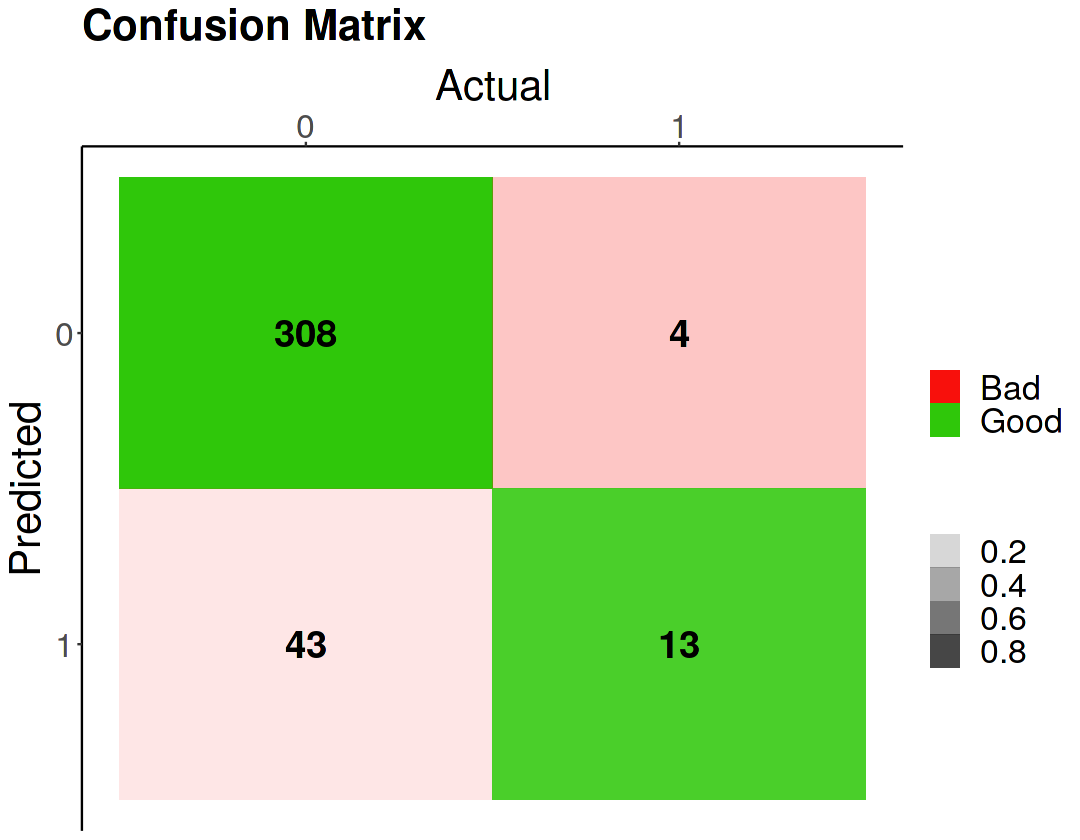

In [31]:
fig(9,7)
warning=FALSE
cm <- confusionMatrix(table(test$Attrition,test$predictedAttrition))
test$predictedAttrition <- as.factor(test$predictedAttrition)

table <- data.frame(confusionMatrix(test$Attrition, test$predictedAttrition)$table)
print(cm)
print(cm$byClass)

plotTable <- table %>%
  mutate(goodbad = ifelse(table$Prediction == table$Reference, "Good", "Bad")) %>%
  group_by(Reference) %>%
  mutate(prop = Freq/sum(Freq))

confusionMatrix <- ggplot(data = plotTable, mapping = aes(x = Reference, y = Prediction, fill = goodbad, alpha = prop)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = .5, fontface  = "bold", alpha = 25, size = 8) +
  scale_fill_manual(name = " ", values = c(Good = "#2FC70A", Bad = "#F8100C")) +
  scale_alpha(name = " ") +
  theme_classic() +
  xlim(rev(levels(table$Reference))) +
  scale_y_discrete(name = "Predicted", limits = c("1","0")) + 
  scale_x_discrete(name = "Actual", position = "top") +
  #theme(legend.position = " ") +
  theme(text=element_text(size=25,  family="sans")) + 
  ggtitle("Confusion Matrix") +
  theme(plot.title = element_text(size = 25, family="sans", face = "bold"))
  
confusionMatrix

##### B. AUC-ROC Curve

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.833


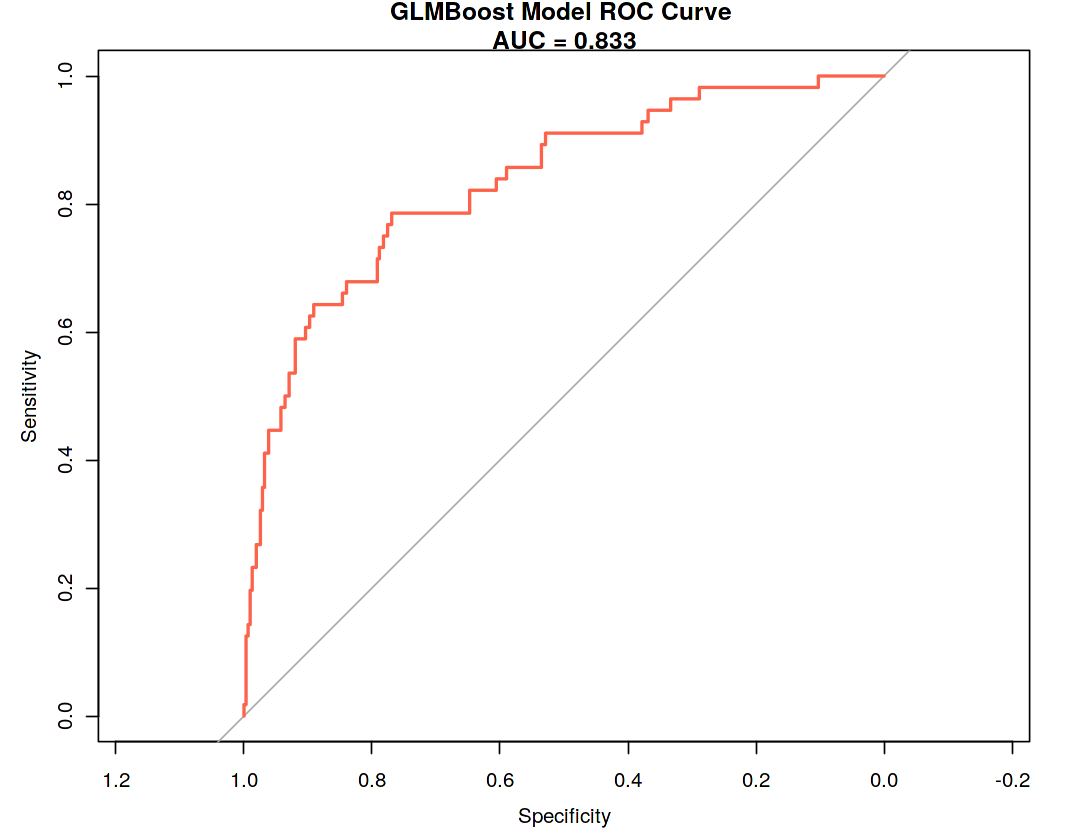

In [32]:
ROCGlmboost <- roc(test$Attrition,probGlmboost)
plot(ROCGlmboost, col = "#fd634b", family = "sans", cex = 2, main = "GLMBoost Model ROC Curve 
AUC = 0.833")
print(auc(ROCGlmboost))

##### For this dataset, logistic regression performs not really excellent but fairly ok. Of course you can also try adding or removing other variables until you are satisfied with your model's performance. Next thing to do is to try other algorithms.

##### That's the end of it. Hope you learned something from this Notebook! :)

##### Sources:
* 1.) Udemy - Data Science Masterclass with R! - https://www.udemy.com/course/data-science-complete-course/
* 2.) https://online.stat.psu.edu/stat462/node/180/
* 3.) https://cran.r-project.org/web/packages/ggalluvial/vignettes/ggalluvial.html